# Graphical exploratory data analysis

### Plotting a histogram of iris data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

In [5]:
sns.set()

### Axis labels

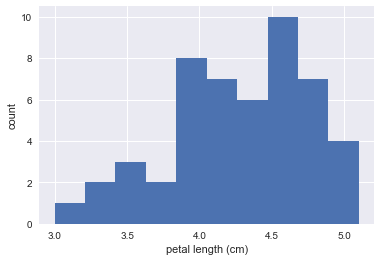

In [6]:
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

### Adjusting the number of bins in a histogram ("square root rule")

In [7]:
n_bins = int(np.sqrt(len(versicolor_petal_length)))

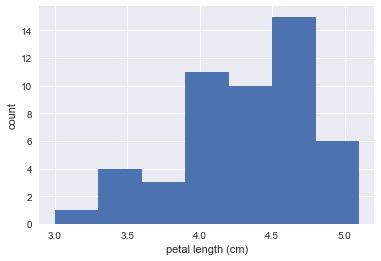

In [8]:
plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
plt.show()

### Bee swarm plot

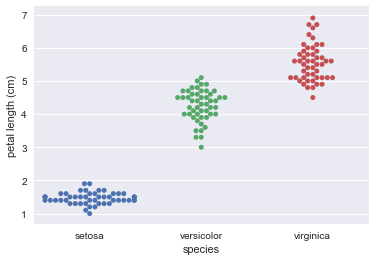

In [9]:
sns.swarmplot(x='species', y='petal_length', data=iris)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

### Computing the ECDF ("Empirical cumulative distribution function")

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
	
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Plotting the ECDF

In [11]:
x_vers, y_vers = ecdf(versicolor_petal_length)

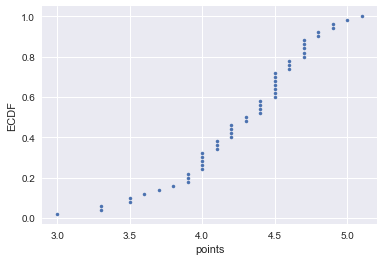

In [12]:
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('points')
plt.show()

### Comparison of ECDFs

In [13]:
setosa_petal_length = iris[iris.species == 'setosa'].petal_length
virginica_petal_length = iris[iris.species == 'virginica'].petal_length

In [14]:
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

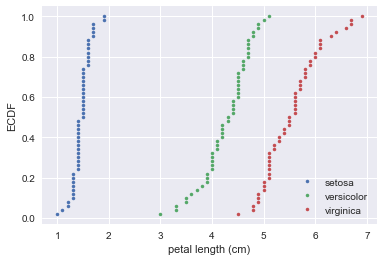

In [15]:
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()